In [1]:
from header import *
from util import *
import types

In [2]:
def get_halo_center(ds, center_guess, radius=50):
    print('Trying to find center within', np.round(radius, decimals=3), 'physical kpc around', center_guess, '...')
    sphere = ds.sphere(center_guess, (radius, 'kpc'))

    x_pos = np.array(sphere['x'].in_units('code_length'))
    y_pos = np.array(sphere['y'].in_units('code_length'))
    z_pos = np.array(sphere['z'].in_units('code_length'))

    dm_density = sphere['Dark_Matter_Density']
    imax1 = (np.where(dm_density > 0.9999 * np.max(dm_density)))[0][0]
    imax2 = (np.where(dm_density == np.max(dm_density)))[0][0]
    print('imax1 =', imax1, 'imax2 =', imax2, 'out of', len(dm_density), 'max density =', np.max(dm_density)) #
    imax = imax1 # imax2
    halo_center = [x_pos[imax], y_pos[imax], z_pos[imax]]
    return halo_center

In [3]:
box_width = 2 * 10 # kpc
res = 0.4 # kpc
field = ('gas', 'metallicity')

In [4]:
foggie_dir = '/Users/acharyya/models/simulation_output/foggie/' #'/Volumes/Elements/foggieforayan/' # 
halo = '8508'
run = 'nref11c_nref9f'
output = 'RD0042'
ds = yt.load(foggie_dir + 'halo_00' + halo + '/' + run + '/' + output + '/' + output)

yt : [INFO     ] 2022-08-03 16:41:28,179 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2022-08-03 16:41:28,180 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-08-03 16:41:28,180 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-03 16:41:28,181 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-03 16:41:28,182 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-08-03 16:41:28,183 Parameters: current_redshift          = 0
yt : [INFO     ] 2022-08-03 16:41:28,183 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-08-03 16:41:28,184 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-08-03 16:41:28,185 Parameters: omega_radiation           = 0
yt : [INFO     ] 2022-08-03 16:41:28,185 Parameters: hubble_constant           = 0.695


In [5]:
args = types.SimpleNamespace()
args.code_path = '/Users/acharyya/Work/astro/ayan_codes/foggie/foggie/'
args.halo = halo
args.run = run
args.output = output
args.system = 'ayan_hd'
args.silent, args.print_to_file, args.pwd = False, False, False
args = pull_halo_center(args)
print(args.halo_center)

[0] {MacBook-Pro.local} Pulling halo center from catalog file

[70482.02075546594 67798.01073691827 73316.14871676877]


In [93]:
box_center = ds.arr(args.halo_center, kpc)
box_width_kpc = ds.arr(box_width, 'kpc')
box = ds.r[box_center[0] - box_width_kpc / 2.: box_center[0] + box_width_kpc / 2., box_center[1] - box_width_kpc / 2.: box_center[1] + box_width_kpc / 2., box_center[2] - box_width_kpc / 2.: box_center[2] + box_width_kpc / 2., ]
print(box_center, box_width)

[70482.02075546594 67798.01073691827 73316.14871676877] kpc 20


In [97]:
Znative = box[field].in_units('Zsun').ndarray_view()
dnative = box[('gas', 'density')].in_units('Msun/pc**3').ndarray_view()

yt : [INFO     ] 2022-08-03 18:24:49,607 Projection completed
yt : [INFO     ] 2022-08-03 18:24:49,625 xlim = -1371050.910126 1506646.931600
yt : [INFO     ] 2022-08-03 18:24:49,627 ylim = -1365532.772147 1512165.069580
yt : [INFO     ] 2022-08-03 18:24:49,629 xlim = -9.528804 10.471196
yt : [INFO     ] 2022-08-03 18:24:49,630 ylim = -9.490453 10.509547
yt : [INFO     ] 2022-08-03 18:24:49,636 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [WARNING  ] 2022-08-03 18:24:49,705 Plotting ('gas', 'metallicity'): All values = 0.0 Zsun
yt : [WARNING  ] 2022-08-03 18:24:49,706 Switching to linear colorbar scaling.



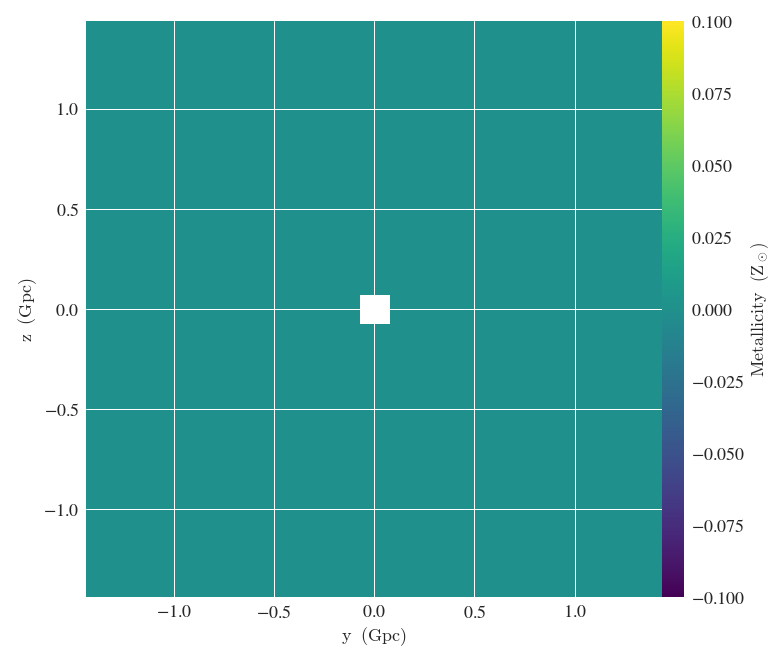

In [95]:
p = yt.ProjectionPlot(ds, 'x', field, center=box_center, data_source=box, width=box_width, weight_field=('gas', 'density'))
#p.set_log(field, True)
p.set_cmap(field, metal_color_map)
p.set_unit(field, 'Zsun')
#p.set_zlim(field, zmin=2e-2, zmax=5e0)
p.show()

yt : [INFO     ] 2022-08-03 16:42:23,339 Projection completed
yt : [INFO     ] 2022-08-03 16:42:23,341 xlim = 0.471127 0.471266
yt : [INFO     ] 2022-08-03 16:42:23,342 ylim = 0.509478 0.509617
yt : [INFO     ] 2022-08-03 16:42:23,343 xlim = 0.471127 0.471266
yt : [INFO     ] 2022-08-03 16:42:23,344 ylim = 0.509478 0.509617
yt : [INFO     ] 2022-08-03 16:42:23,345 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



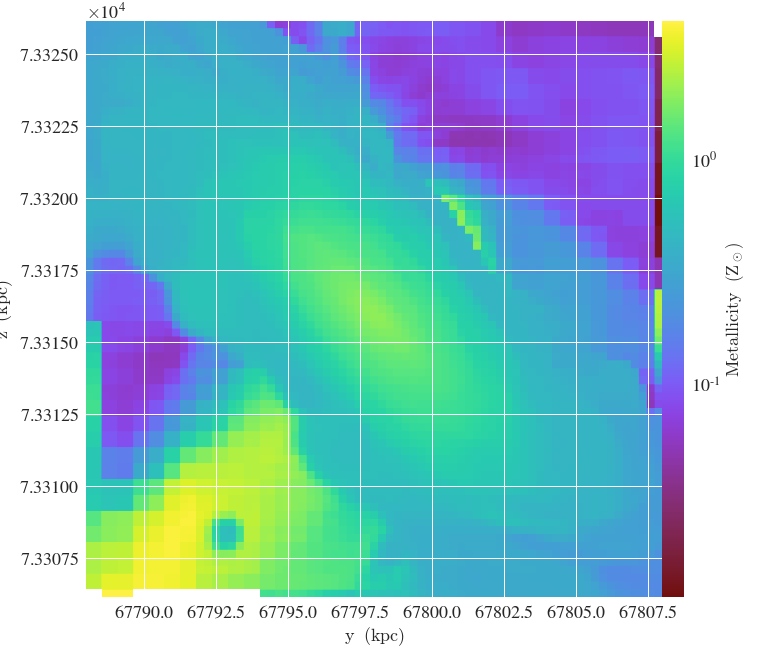

In [10]:
prjx = ds.proj(field, 'x', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjx.plot()
#p.set_log(field, True)
#p.set_cmap(field, metal_color_map)
#p.set_unit(field, 'Zsun')
#p.set_zlim(field, zmin=2e-2, zmax=5e0)

yt : [INFO     ] 2022-08-03 18:26:35,710 Making a fixed resolution buffer of (('gas', 'metallicity')) 50 by 50
yt : [INFO     ] 2022-08-03 18:26:35,714 Making a fixed resolution buffer of (('gas', 'density')) 50 by 50


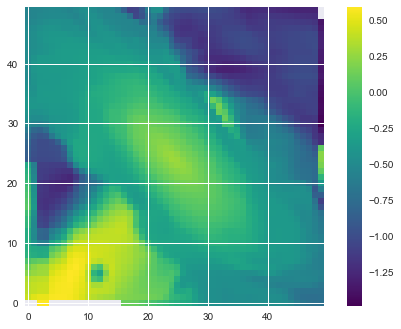

In [100]:
frbx = prjx.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrbx = np.array(frbx['gas', 'metallicity'])
dfrbx = np.array(frbx['gas', 'density'])
plt.imshow(np.log10(Zfrbx), cmap='viridis')#, vmin=2e-2, vmax=5e0)
plt.colorbar()

yt : [INFO     ] 2022-08-03 16:42:55,531 Projection completed
yt : [INFO     ] 2022-08-03 16:42:55,532 xlim = 0.509478 0.509617
yt : [INFO     ] 2022-08-03 16:42:55,533 ylim = 0.489781 0.489920
yt : [INFO     ] 2022-08-03 16:42:55,534 xlim = 0.509478 0.509617
yt : [INFO     ] 2022-08-03 16:42:55,535 ylim = 0.489781 0.489920
yt : [INFO     ] 2022-08-03 16:42:55,536 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



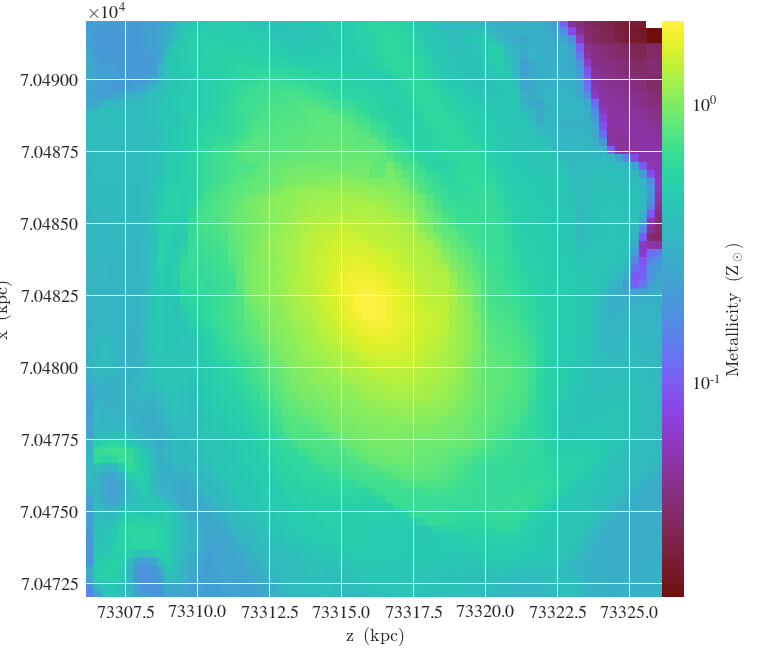

In [12]:
prjy = ds.proj(('gas', 'metallicity'), 'y', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjy.plot()

yt : [INFO     ] 2022-08-03 18:26:41,833 Making a fixed resolution buffer of (('gas', 'metallicity')) 50 by 50
yt : [INFO     ] 2022-08-03 18:26:41,839 Making a fixed resolution buffer of (('gas', 'density')) 50 by 50


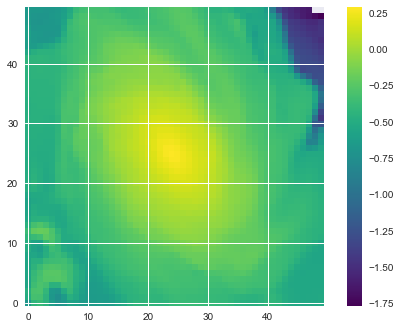

In [101]:
frby = prjy.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrby = np.array(frby['gas', 'metallicity'])
dfrby = np.array(frby['gas', 'density'])
plt.imshow(np.log10(Zfrby), cmap='viridis')
plt.colorbar()

yt : [INFO     ] 2022-08-03 16:43:05,752 Projection completed
yt : [INFO     ] 2022-08-03 16:43:05,754 xlim = 0.489781 0.489920
yt : [INFO     ] 2022-08-03 16:43:05,755 ylim = 0.471127 0.471266
yt : [INFO     ] 2022-08-03 16:43:05,755 xlim = 0.489781 0.489920
yt : [INFO     ] 2022-08-03 16:43:05,756 ylim = 0.471127 0.471266
yt : [INFO     ] 2022-08-03 16:43:05,757 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



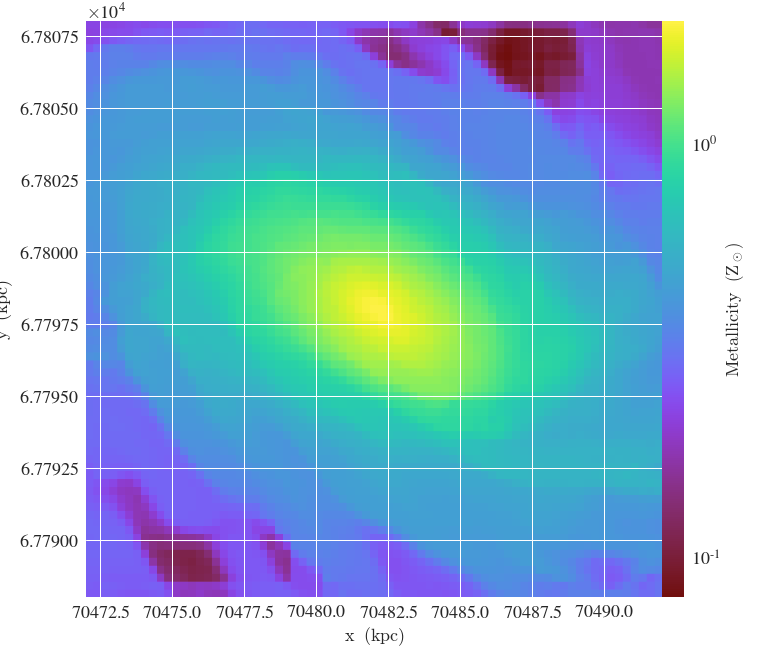

In [14]:
prjz = ds.proj(('gas', 'metallicity'), 'z', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjz.plot()

yt : [INFO     ] 2022-08-03 18:26:59,075 Making a fixed resolution buffer of (('gas', 'metallicity')) 50 by 50
yt : [INFO     ] 2022-08-03 18:26:59,103 Making a fixed resolution buffer of (('gas', 'density')) 50 by 50
yt : [INFO     ] 2022-08-03 18:26:59,290 Projection completed


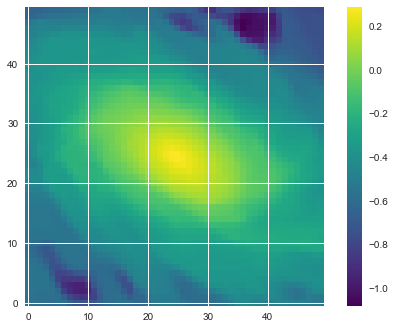

In [102]:
frbz = prjz.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrbz = np.array(frbz['gas', 'metallicity'])
dfrbz = np.array(frbz['gas', 'density'])
plt.imshow(np.log10(Zfrbz), cmap='viridis')
plt.colorbar()

(0.0, 2.0)

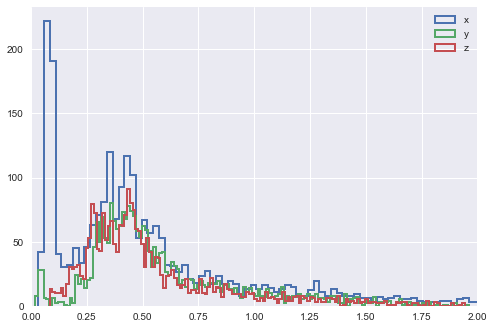

In [108]:
plt.figure()
plt.hist(Zfrbx.flatten(), histtype='step', bins=150, lw=2, label='x')#, weights=dfrbx.flatten())
plt.hist(Zfrby.flatten(), histtype='step', bins=150, lw=2, label='y')#, weights=dfrby.flatten())
plt.hist(Zfrbz.flatten(), histtype='step', bins=150, lw=2, label='z')#, weights=dfrbz.flatten())
plt.legend()
plt.xlim(0, 2)

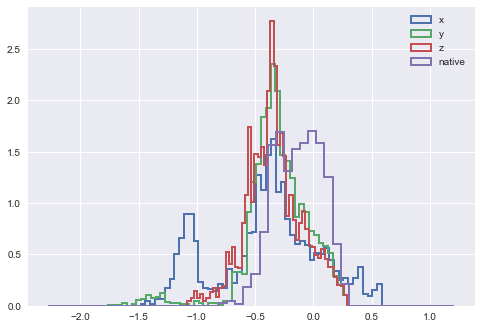

In [110]:
plt.hist(np.log10(Zfrbx.flatten()), bins=50, histtype='step', lw=2, label='x', density=True)#, weights=dfrbx.flatten())
plt.hist(np.log10(Zfrby.flatten()), bins=50, histtype='step', lw=2, label='y', density=True)#, weights=dfrby.flatten())
plt.hist(np.log10(Zfrbz.flatten()), bins=50, histtype='step', lw=2, label='z', density=True)#, weights=dfrbz.flatten())
plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, label='native', density=True, weights=dnative.flatten())
plt.legend()
#plt.xlim(-1, 1)

Up to this ^ was 2D FRBs..the following is for 3D FRBs

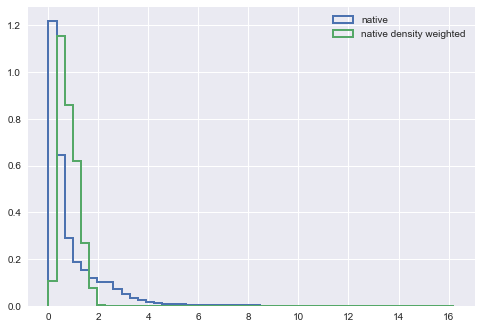

In [109]:
plt.figure()
plt.hist(Znative, bins=50, histtype='step', lw=2, density=True, label='native')
plt.hist(Znative, bins=50, histtype='step', lw=2, density=True, weights=dnative, label='native density weighted')
plt.legend()

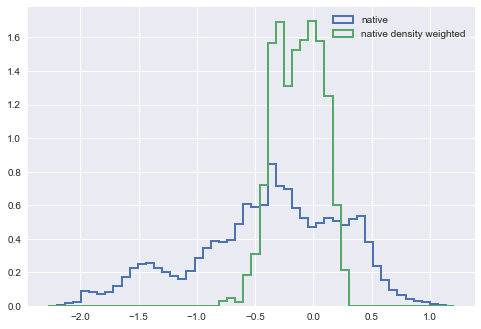

In [111]:
plt.figure()
plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, density=True, label='native')
plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, density=True, weights=dnative, label='native density weighted')
plt.legend()
#plt.xlim(-1.5, 0.2)

In [166]:
ax = 1 # 0 Or 1 Or 2
ncells = int(box_width/res)
print(ncells)
#box = ds.r[box_center[0] - box_width_kpc / 2.: box_center[0] + box_width_kpc / 2.:str(ncells)+'j', box_center[1] - box_width_kpc / 2.: box_center[1] + box_width_kpc / 2.:str(ncells)+'j', box_center[2] - box_width_kpc / 2.: box_center[2] + box_width_kpc / 2.:str(ncells)+'j']
box = ds.arbitrary_grid(left_edge=[box_center[0] - box_width_kpc / 2., box_center[1] - box_width_kpc / 2., box_center[2] - box_width_kpc / 2.], \
                        right_edge=[box_center[0] + box_width_kpc / 2., box_center[1] + box_width_kpc / 2., box_center[2] + box_width_kpc / 2.], \
                        dims=[ncells, ncells, ncells])


50


In [167]:
ds.all_data()[('gas', 'mass')].sum(), box_width_kpc, np.shape(box), box[('gas', 'mass')].sum()

(unyt_quantity(3.66074507e+49, 'g'),
 unyt_array(20, 'kpc'),
 (50, 50, 50),
 unyt_quantity(2.20041885e+43, 'g'))

In [160]:
box[('gas', 'mass')]

unyt_array([1.99240600e+38, 1.96054909e+38, 1.63535147e+38, ...,
            4.49017918e+33, 4.18523563e+33, 4.24135739e+33], 'g')

In [157]:
den_res = box['gas', 'density']
plt.imshow(np.log10(den_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

AxisError: axis 1 is out of bounds for array of dimension 1

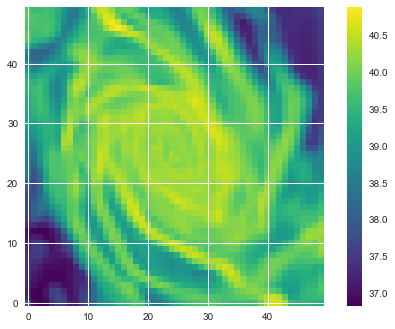

In [133]:
mass_res = box['mass']
plt.imshow(np.log10(mass_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

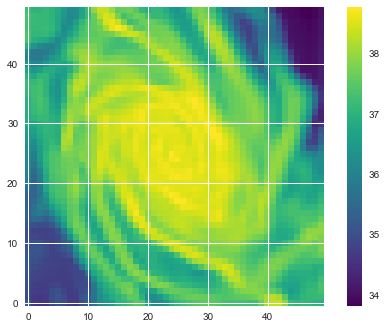

In [134]:
metal_res = box['metal_mass']
plt.imshow(np.log10(metal_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

(50, (50, 50, 50), (50, 50), unyt_quantity(0.46389452, 'Zsun'))

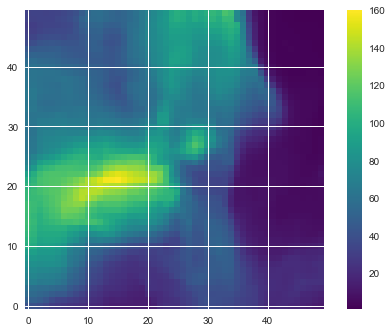

In [135]:
Zres_direct = box['metallicity']
plt.imshow(Zres_direct.mean(axis=ax), cmap='viridis')
plt.colorbar()
len(Zres_direct), np.shape(Zres_direct),np.median(Zres_direct)

(50, (50, 50), unyt_quantity(0.48622912, '(dimensionless)'))

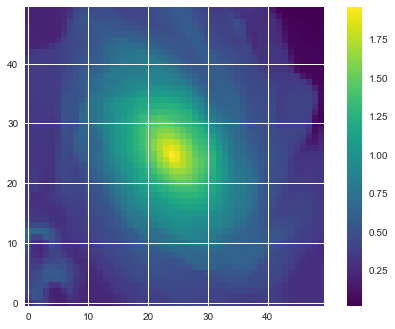

In [154]:
from yt.utilities.physical_ratios import metallicity_sun
Zres_div = metal_res.sum(axis=ax) / mass_res.sum(axis=ax) / metallicity_sun
plt.imshow(Zres_div, cmap='viridis')
plt.colorbar()
len(Zres_div), np.shape(Zres_div),  np.median(Zres_div)

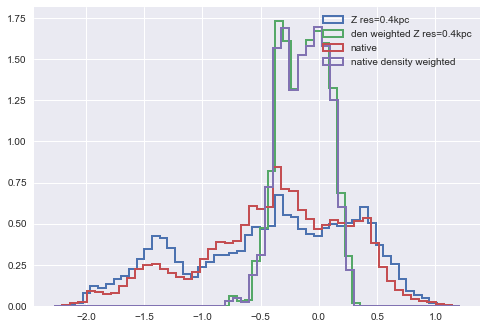

In [140]:
#plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, label='native')
plt.hist(np.log10(Zres_direct.flatten()), bins=50, histtype='step', lw=2, density=True, label='Z res=%.1Fkpc'%(res))
plt.hist(np.log10(Zres_direct.flatten()), bins=50, histtype='step', lw=2, density=True, weights=den_res.flatten(), label='den weighted Z res=%.1Fkpc'%(res))

plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, density=True, label='native')
plt.hist(np.log10(Znative), bins=50, histtype='step', lw=2, density=True, weights=dnative, label='native density weighted')

plt.legend()
#plt.xlim(-1.5, 0.2)